<a href="https://colab.research.google.com/github/Prashikdhole/Titanic_Classification_ML/blob/main/Titanic_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Titanic Classification

##### **Project Type**    - Classification
##### **Industry**    - Bharat Intern
##### **Contribution**    - Individual
##### **Team Member 1** -**Prashik Dhole**


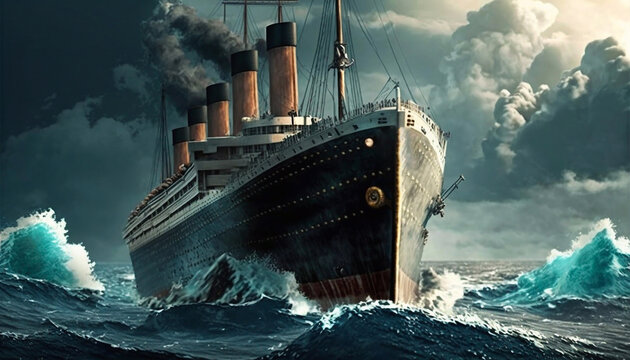

# **GitHub Link**

# **Problem Statement**

In this data science project, we aim to build a predictive system to determine whether a person would have survived the sinking of the RMS Titanic. Using a dataset containing passenger information, including socio-economic status, age, gender, and survival outcomes, we will preprocess the data and select relevant features.

Our goal is to train machine learning models to accurately classify passengers as survivors or non-survivors. By evaluating the models' performance, we intend to uncover the most critical factors that likely contributed to the passengers' survival during this historic disaster.

The project seeks to provide valuable insights into the impact of socio-economic status, age, gender, and other attributes on the likelihood of surviving the Titanic sinking, contributing to a deeper understanding of this tragic event.

# **Algorithm Used**

1 : Decision Trees

2 : Logistic Regression

3 : Random Forest

4 : Gradient Boosting

5: Ada Boost Classifier


# ***Let's Begin***

## ***1. Know Your Data***

###**1.Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


### **2.Loading the Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Titanic-Dataset.csv')

### **3.Dataset First View**

In [ ]:
df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
df.shape

(891, 12)

### **4.Dataset Information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **2.Data Wrangling**

**1.Hadling null values**

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.drop(['Cabin'],axis = 1 ,inplace=True)

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].mode().iloc[0])
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode().iloc[0])

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**2.Handling duplicate values**

In [ ]:
df[df.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [ ]:
len(df[df.duplicated()])

0

**3.convert categorical into numerical column.**

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [ ]:
df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
new_df = pd.get_dummies(df,columns=['Sex','Embarked'])

In [ ]:
new_df.head(10)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1
5,6,0,3,"Moran, Mr. James",24.0,0,0,330877,8.4583,0,1,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,0,1,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,0,1,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,1,0,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,1,0,1,0,0


**4.Convert float value column into int**

In [ ]:
new_df['Age'] = new_df['Age'].astype('int64')

In [ ]:
new_df.head(10)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,1,0,PC 17599,71.2833,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,113803,53.1000,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35,0,0,373450,8.0500,0,1,0,0,1
5,6,0,3,"Moran, Mr. James",24,0,0,330877,8.4583,0,1,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",54,0,0,17463,51.8625,0,1,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",2,3,1,349909,21.0750,0,1,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27,0,2,347742,11.1333,1,0,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14,1,0,237736,30.0708,1,0,1,0,0


**5.Drop unneccessary column**

In [ ]:
new_df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [ ]:
new_df.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22,1,0,7.2500,0,1,0,0,1
1,1,1,38,1,0,71.2833,1,0,1,0,0
2,1,3,26,0,0,7.9250,1,0,0,0,1
3,1,1,35,1,0,53.1000,1,0,0,0,1
4,0,3,35,0,0,8.0500,0,1,0,0,1
5,0,3,24,0,0,8.4583,0,1,0,1,0
6,0,1,54,0,0,51.8625,0,1,0,0,1
7,0,3,2,3,1,21.0750,0,1,0,0,1
8,1,3,27,0,2,11.1333,1,0,0,0,1
9,1,2,14,1,0,30.0708,1,0,1,0,0


# **3.Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

# **Chart - 1**

In [ ]:
new_df.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22,1,0,7.2500,0,1,0,0,1
1,1,1,38,1,0,71.2833,1,0,1,0,0
2,1,3,26,0,0,7.9250,1,0,0,0,1
3,1,1,35,1,0,53.1000,1,0,0,0,1
4,0,3,35,0,0,8.0500,0,1,0,0,1
5,0,3,24,0,0,8.4583,0,1,0,1,0
6,0,1,54,0,0,51.8625,0,1,0,0,1
7,0,3,2,3,1,21.0750,0,1,0,0,1
8,1,3,27,0,2,11.1333,1,0,0,0,1
9,1,2,14,1,0,30.0708,1,0,1,0,0


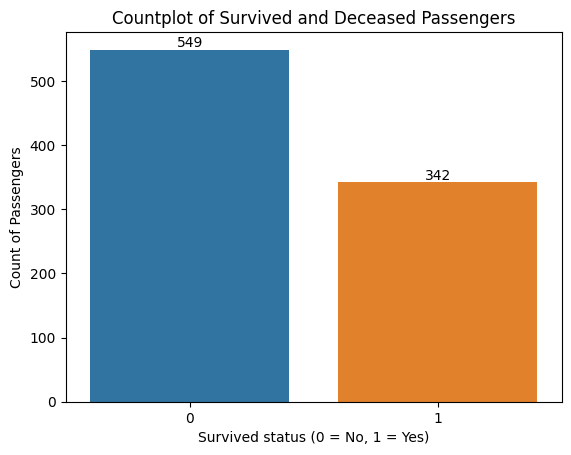

In [ ]:
a = new_df.groupby('Survived',as_index=False).Age.count()

ax = sns.barplot(data=a,x='Survived',y='Age')

plt.title('Countplot of Survived and Deceased Passengers')
plt.xlabel('Survived status (0 = No, 1 = Yes)')
plt.ylabel('Count of Passengers')

for i in ax.containers:
    ax.bar_label(i)

plt.show()

# **chart-2**

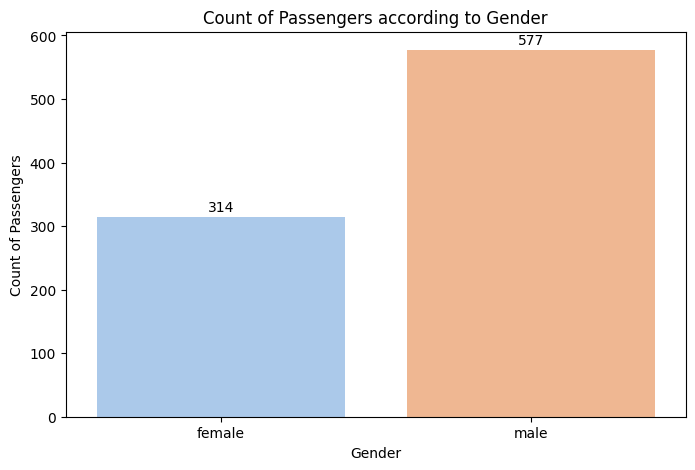

In [ ]:
b = df.groupby(['Sex'],as_index=False)['Age'].count()

plt.figure(figsize=(8,5))

bx = sns.barplot(data = b, y='Age', x = 'Sex',palette = 'pastel')

for i in bx.containers:
  bx.bar_label(i,label_type='edge',fontsize=10,padding = 2)

plt.title('Count of Passengers according to Gender')
plt.xlabel('Gender')
plt.ylabel('Count of Passengers')
plt.show()

# **chart-3**

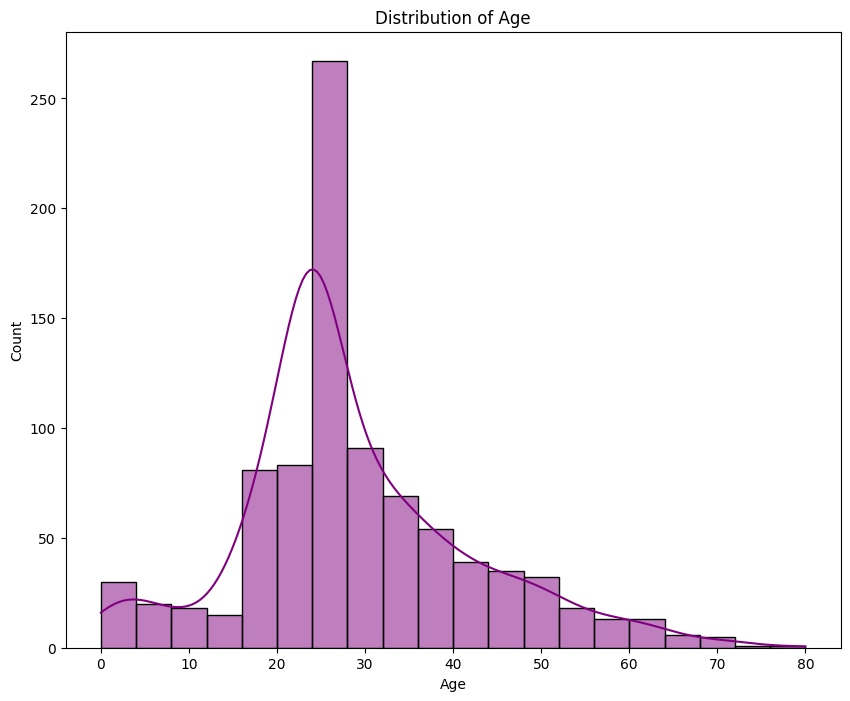

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(new_df['Age'],bins=20,kde = True,color = 'purple')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


# **chart-4**

In [ ]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

array([<Axes: ylabel='Survived'>], dtype=object)

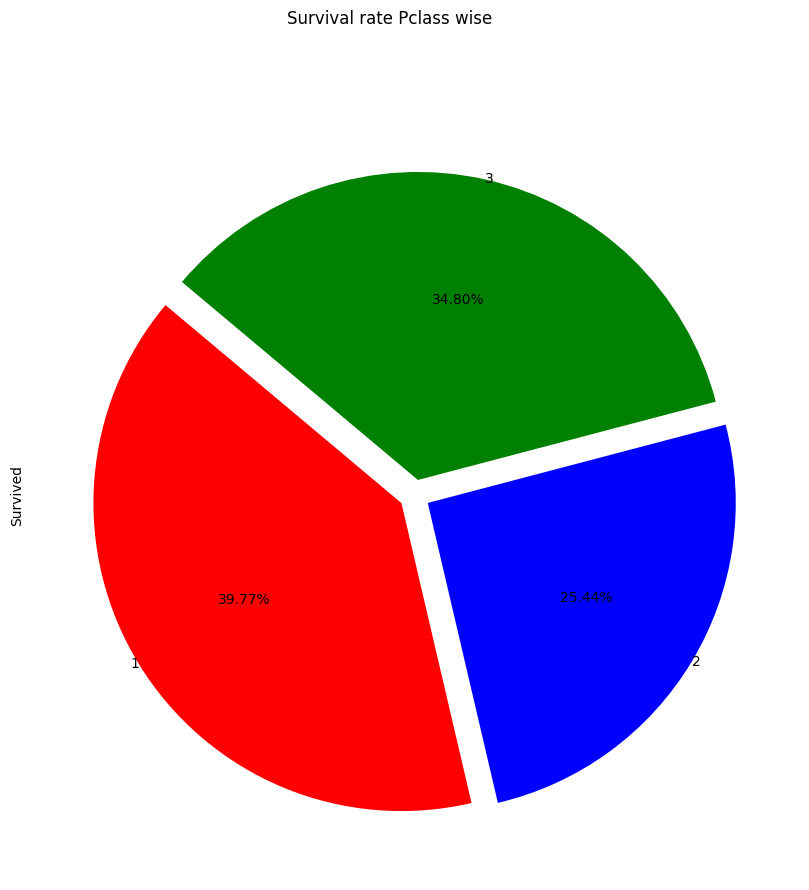

In [ ]:
survival_counts = new_df.groupby('Pclass')['Survived'].sum()

survival_counts.plot(kind='pie',figsize=(20,10),title='Survival rate Pclass wise',autopct='%1.2f%%',colors= ['red','blue','green'],startangle=140,shadow=False,subplots=True, labeldistance = 1, explode = [0.05,0.05,0.05])

# **chart-5**

In [ ]:
new_df.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22,1,0,7.2500,0,1,0,0,1
1,1,1,38,1,0,71.2833,1,0,1,0,0
2,1,3,26,0,0,7.9250,1,0,0,0,1
3,1,1,35,1,0,53.1000,1,0,0,0,1
4,0,3,35,0,0,8.0500,0,1,0,0,1
5,0,3,24,0,0,8.4583,0,1,0,1,0
6,0,1,54,0,0,51.8625,0,1,0,0,1
7,0,3,2,3,1,21.0750,0,1,0,0,1
8,1,3,27,0,2,11.1333,1,0,0,0,1
9,1,2,14,1,0,30.0708,1,0,1,0,0


In [ ]:
new_df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

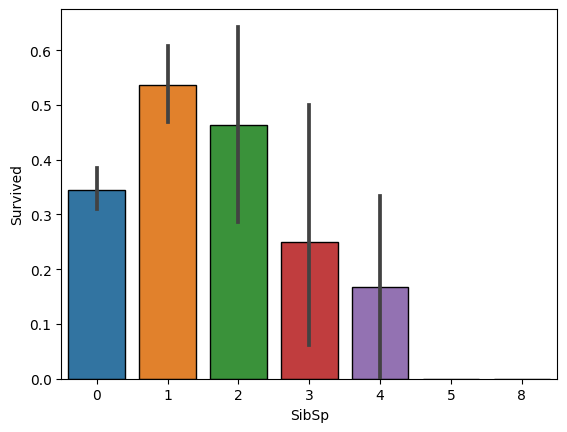

In [ ]:
sns.barplot(x='SibSp',y='Survived',data=new_df,edgecolor='black')
plt.show()

# **Chart-6**

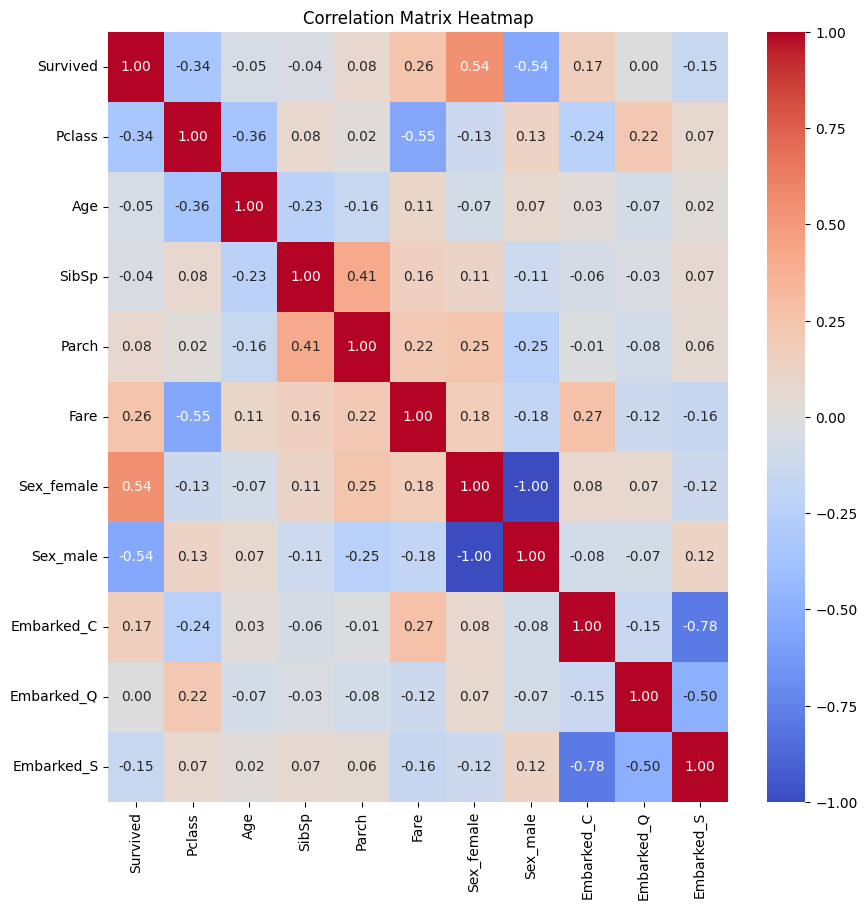

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

# **4.ML Model Implementation**

In [ ]:
new_df.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22,1,0,7.2500,0,1,0,0,1
1,1,1,38,1,0,71.2833,1,0,1,0,0
2,1,3,26,0,0,7.9250,1,0,0,0,1
3,1,1,35,1,0,53.1000,1,0,0,0,1
4,0,3,35,0,0,8.0500,0,1,0,0,1
5,0,3,24,0,0,8.4583,0,1,0,1,0
6,0,1,54,0,0,51.8625,0,1,0,0,1
7,0,3,2,3,1,21.0750,0,1,0,0,1
8,1,3,27,0,2,11.1333,1,0,0,0,1
9,1,2,14,1,0,30.0708,1,0,1,0,0


In [ ]:
x = new_df.drop(columns=['Survived'])
y = new_df['Survived']

**1.Split the dataset into train and test**

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_train.head(10)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
140,3,24,0,2,15.2458,1,0,1,0,0
439,2,31,0,0,10.5000,0,1,0,0,1
817,2,31,1,1,37.0042,0,1,1,0,0
378,3,20,0,0,4.0125,0,1,1,0,0
491,3,21,0,0,7.2500,0,1,0,0,1
331,1,45,0,0,28.5000,0,1,0,0,1
588,3,22,0,0,8.0500,0,1,0,0,1
358,3,24,0,0,7.8792,1,0,0,1,0
674,2,24,0,0,0.0000,0,1,0,0,1
162,3,26,0,0,7.7750,0,1,0,0,1


In [ ]:
x_train.shape

(712, 10)

In [ ]:
x_test.head(10)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
495,3,24,0,0,14.4583,0,1,1,0,0
648,3,24,0,0,7.5500,0,1,0,0,1
278,3,7,4,1,29.1250,0,1,0,1,0
31,1,24,1,0,146.5208,1,0,1,0,0
255,3,29,0,2,15.2458,1,0,1,0,0
298,1,24,0,0,30.5000,0,1,0,0,1
609,1,40,0,0,153.4625,1,0,0,0,1
318,1,31,0,2,164.8667,1,0,0,0,1
484,1,25,1,0,91.0792,0,1,1,0,0
367,3,24,0,0,7.2292,1,0,1,0,0


In [ ]:
x_test.shape

(179, 10)

In [ ]:
y_train.shape

(712,)

In [ ]:
y_test.shape

(179,)

# **1.DecisionTree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

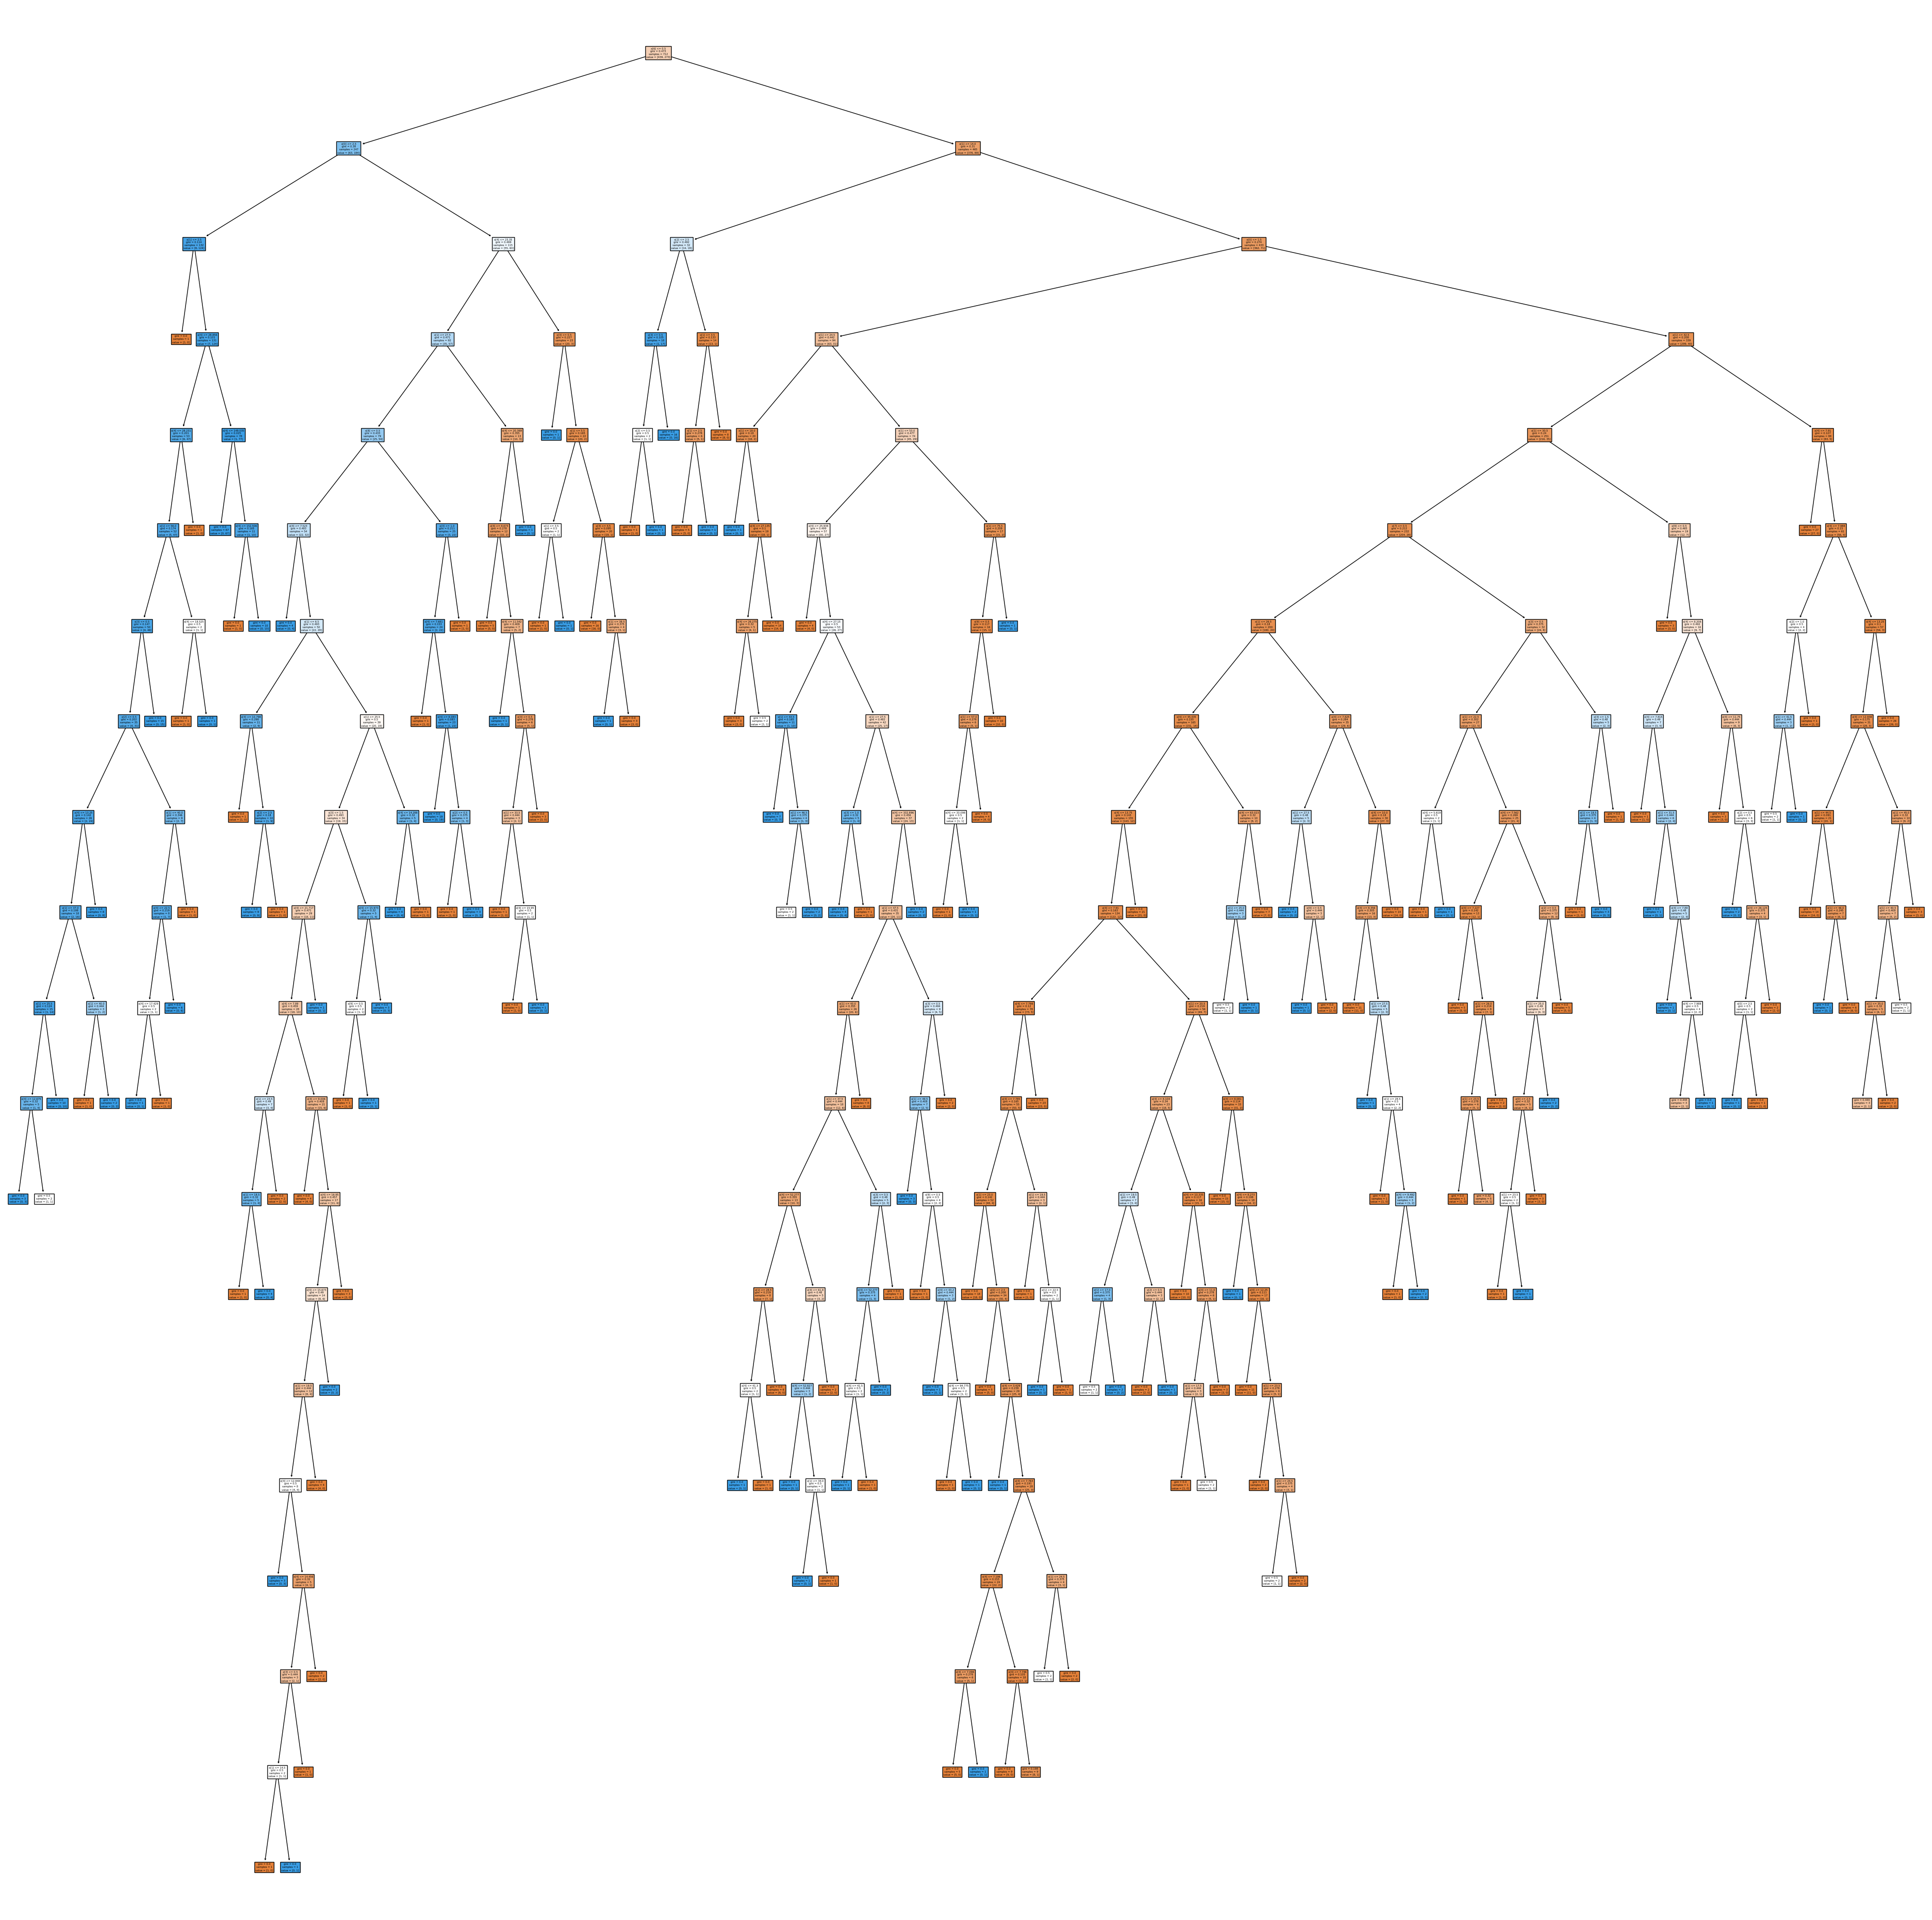

In [ ]:
from sklearn import tree
plt.figure(figsize=(50,50))
tree.plot_tree(clf,filled=True)
plt.show()

In [ ]:
y_train_pred = clf.predict(x_train)

In [ ]:
y_test_pred = clf.predict(x_test)

**Evalute the model**

In [ ]:
acc = accuracy_score(y_train_pred,y_train)
print(f'Accuracy score  for the training dataset is {acc}')

con = classification_report(y_train_pred,y_train)
print('Classification report is',con)


Accuracy score  for the training dataset is 0.9803370786516854
Classification report is               precision    recall  f1-score   support

           0       1.00      0.97      0.98       453
           1       0.95      1.00      0.97       259

    accuracy                           0.98       712
   macro avg       0.97      0.98      0.98       712
weighted avg       0.98      0.98      0.98       712



In [ ]:
acc_test = accuracy_score(y_test_pred,y_test)
print(f'Accuracy score for the test dataset is {acc_test}')
con_test = classification_report(y_test_pred,y_test)
print('Classification report for test dataset is',con_test)

Accuracy score for the test dataset is 0.8100558659217877
Classification report for test dataset is               precision    recall  f1-score   support

           0       0.88      0.82      0.85       118
           1       0.70      0.79      0.74        61

    accuracy                           0.81       179
   macro avg       0.79      0.80      0.79       179
weighted avg       0.82      0.81      0.81       179



# Decision Tree classifier with hypertuning

In [ ]:
parameters = {'criterion':['gini','entropy','log_loss'],
             'splitter':['best','random'],
             'min_samples_split':[0,1,2,3,4,5,6,7,8,9,10],
             'max_depth':[0,1,2,3,4,5,6,7,8,9,10,12,15],
             'min_samples_leaf':[0,1,2,3,4,5,6,7,8,9,10,12,14],
             'max_features':['log','auto','sqrt']}

In [ ]:
des_hyp = GridSearchCV(clf,parameters,cv=5,scoring='accuracy')

In [ ]:
des_hyp.fit(x_train,y_train)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feat

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12,
                                       15],
                         'max_features': ['log', 'auto', 'sqrt'],
                         'min_samples_leaf': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                              12, 14],
                         'min_samples_split': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                               10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
best_params = des_hyp.best_params_
print('best params:',best_params)

best params: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 8, 'splitter': 'best'}


In [ ]:
best_score = des_hyp.best_score_
print('best score',best_score)

best score 0.8258347286516301


In [ ]:
y_train_pred_htc = des_hyp.predict(x_train)

score_train = accuracy_score(y_train_pred_htc,y_train)
print('Accuracy score is',score_train)

Accuracy score is 0.7893258426966292


In [ ]:
y_test_pred_htc = des_hyp.predict(x_test)

score_test = accuracy_score(y_test_pred_htc,y_test)
print('Acuuracy score is',score_test)

Acuuracy score is 0.7877094972067039


# **Model 2: Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
Lreg = LogisticRegression()
Lreg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_train_pred_Lreg = Lreg.predict(x_train)
Lreg_score_train = accuracy_score(y_train_pred_Lreg,y_train)
print('Accuracy score is:',Lreg_score_train)

Accuracy score is: 0.7963483146067416


In [ ]:
y_test_pred_Lreg = Lreg.predict(x_test)
Lreg_score_test = accuracy_score(y_test_pred_Lreg,y_test)
print('Accuracy score is:',Lreg_score_test)

Accuracy score is: 0.8044692737430168


# **Logistic Regression With Hyperparamter tuning**

In [ ]:
parameters = {'penalty':['l1','l2','elasticnet'],
             'C':[1.0,2.0,3.0,4.0,5.0],
             'max_iter':[100,200,300,500,1000]
              }

lregcv = GridSearchCV(Lreg,parameters,cv=5,scoring='accuracy')

In [ ]:
lregcv.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1.0, 2.0, 3.0, 4.0, 5.0],
                         'max_iter': [100, 200, 300, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [ ]:
y_train_pred_Lregcv = lregcv.predict(x_train)

train_score_lregcv = accuracy_score(y_train_pred_Lregcv,y_train)
print('accuracy score is;',train_score_lregcv)

accuracy score is; 0.7921348314606742


In [ ]:
y_test_pred_Lregcv = lregcv.predict(x_test)

test_score_lregcv = accuracy_score(y_test_pred_Lregcv,y_test)
print('Accuracy score is:',test_score_lregcv)

Accuracy score is: 0.8156424581005587


# **Model 3 : Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_train_pred_rf = rfc.predict(x_train)

train_score_rf = accuracy_score(y_train,y_train_pred_rf)
print('accuracy score is:',train_score_rf)

accuracy score is: 0.9803370786516854


In [ ]:
y_test_pred_rf = rfc.predict(x_test)

test_score_rf = accuracy_score(y_test_pred_rf,y_test)
print('accuracy score is',test_score_rf)

accuracy score is 0.8435754189944135


# **Random Forest Classifier with hyper parameter tuning**

In [ ]:
parameters = {'criterion':['gini', 'entropy', 'log_loss'],
            'n_estimators':[100,200,400,500,1000],
            'min_samples_split': [3,4,5,7],
            'max_depth':[5,6,7,8,9,10],
            'min_samples_leaf':[5,6,7,8,9],
            'max_features':['sqrt', 'log2']}



In [ ]:
rfc_hyp =RandomForestClassifier(criterion= 'entropy',
 max_depth= 7,
 max_features= 'log2',
 min_samples_leaf= 5,
 min_samples_split= 7,
 n_estimators=100)

In [ ]:
rfc_hyp = rfc_hyp.fit(x_train,y_train)

In [ ]:
y_train_pred_rfc_hyp  = rfc_hyp.predict(x_train)

acc_score_rfc_hyp = accuracy_score(y_train_pred_rfc_hyp,y_train)

print('accuracy score is:',acc_score_rfc_hyp)

accuracy score is: 0.8553370786516854


In [ ]:
y_test_pred_rfc_hyp  = rfc_hyp.predict(x_test)

acc_score_rfc_hyp = accuracy_score(y_test_pred_rfc_hyp,y_test)

print('accuracy score is:',acc_score_rfc_hyp)

accuracy score is: 0.8324022346368715


# **Model 4-Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbd  = GradientBoostingClassifier()

In [ ]:
gbd.fit(x_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_train_pred_gbd  = gbd.predict(x_train)

acc_score_gdb = accuracy_score(y_train_pred_gbd,y_train)

print('accracy score is:',acc_score_gdb)

accracy score is: 0.9058988764044944


In [ ]:
y_test_pred_gbd  = gbd.predict(x_test)

acc_score_gdb = accuracy_score(y_test_pred_gbd,y_test)

print('accracy score is:',acc_score_gdb)

accracy score is: 0.8659217877094972


# **Gradient Boosting technique with Hypermeter tuning**

In [ ]:
parameters= {'loss':['log_loss', 'deviance', 'exponential'],
           'n_estimators':[100,200,500,1000],
           'criterion':['friedman_mse','squared_error'],
           'max_features':['auto', 'sqrt', 'log2']  }

In [ ]:
gbd_cv = GridSearchCV(gbd,parameters,cv = 5 ,scoring='accuracy')

In [ ]:
gbd_cv.fit(x_train,y_train)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['log_loss', 'deviance', 'exponential'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 500, 1000]},
             scoring='accuracy')

In [ ]:
y_train_pred_gbd_cv = gbd_cv.predict(x_train)

acc_score_gbd_cv = accuracy_score(y_train_pred_gbd_cv,y_train)

print('accuracy_score is:',acc_score_gbd_cv)

accuracy_score is: 0.8707865168539326


In [ ]:
y_test_pred_gbd_cv = gbd_cv.predict(x_test)

acc_score_gbd_cv = accuracy_score(y_test_pred_gbd_cv,y_test)

print('accuracy_score is:',acc_score_gbd_cv)

accuracy_score is: 0.8379888268156425


# **Model 5: AdaBoost Classifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada = AdaBoostClassifier()

In [ ]:
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [ ]:
y_train_pred_ada = ada.predict(x_train)

acc_score_ada = accuracy_score(y_train_pred_ada,y_train)

print('accuracy_score is:',acc_score_ada)

accuracy_score is: 0.8328651685393258


In [ ]:
y_test_pred_ada = ada.predict(x_test)

acc_score_ada = accuracy_score(y_test_pred_ada,y_test)

print('accuracy_score is:',acc_score_ada)

accuracy_score is: 0.8156424581005587


# **Conclusion**

In [ ]:
# Data
models = ['DecisionTree', 'DecisionTree (CV)', 'LogisticRegression', 'LogisticRegression (CV)',
          'RandomForest', 'RandomForest (CV)', 'GradientBoosting', 'GradientBoosting (CV)', 'AdaBoost']
train_accuracy = [0.98,0.78,0.79,0.79,0.98,0.85,0.90,0.87,0.83]
test_accuracy = [0.81,0.78,0.80,0.81,0.84,0.83,0.86,0.83,0.81]

# Creating a DataFrame
accuracy_df = pd.DataFrame({'Model': models, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy})

# Displaying the DataFrame
print(accuracy_df)

                     Model  Train Accuracy  Test Accuracy
0             DecisionTree            0.98           0.81
1        DecisionTree (CV)            0.78           0.78
2       LogisticRegression            0.79           0.80
3  LogisticRegression (CV)            0.79           0.81
4             RandomForest            0.98           0.84
5        RandomForest (CV)            0.85           0.83
6         GradientBoosting            0.90           0.86
7    GradientBoosting (CV)            0.87           0.83
8                 AdaBoost            0.83           0.81


 **Based on the information provided in the table, it can be inferred that, following data balancing, the 'GradientBoostingClassifier' with Hyperparameter tuning achieved a notable increase in accuracy scores for both the training and test datasets**

# **6: Feature Importance Analysis**

In [ ]:
feature_importances = rfc.feature_importances_

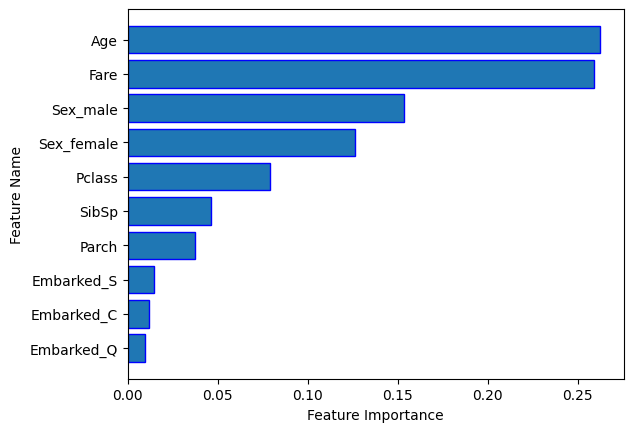

In [ ]:
sorted_feature_importances = np.sort(feature_importances)
sorted_feature_names = np.array(x_train.columns)[np.argsort(feature_importances)]


plt.barh(sorted_feature_names, sorted_feature_importances,edgecolor = 'blue')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance')
plt.show()